## Anomaly Detection for Time Series with Monte Carlo Simulations

An interesting way to detect anomalies by simulating paths through time series data

Anomaly detection with unlabeled time series data can be a complex task. A lot of the issues involve needing to find a technique that can properly account for a series' seasonality, trends, correlated series, and other peculiarities. Estimations of series with LSTMs, which should be able to pick up on many of these peculiarities, is popular for anomaly detection for this reason. 

Monte Carlo simulation can also be a useful technique for anomaly detection in time series if transformations are taken on the series to make it normally distributed, non-seasonal, and stationary. I will demonstrate an example of the technique, as well as possible mitigation strategies to apply on anomalies after they are identified, with the scalecast library in python. These methods work on data that is unlabeled, meaning we don't know before we start which points are and are not anomalies.

### Data Preprocessing

To install requirements:

In [1]:
pip install scalecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 232 kB 14.4 MB/s 
     |████████████████████████████████| 216 kB 71.6 MB/s 
     |████████████████████████████████| 569 kB 52.4 MB/s 
     |████████████████████████████████| 133 kB 70.5 MB/s 
  Created wheel for scalecast: filename=SCALECAST-0.13.0-py3-none-any.whl size=80267 sha256=5a53a109297a778f77ee9399a6d8b87ec28df4ac5ee4a217f0121228db8f39f9
  Stored in directory: /root/.cache/pip/wheels/cf/07/77/b7b3f1f2314786d145aeefccd6b91c998099a611b956abdd1d
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=a0c199e17a4ae085be0f3e50f1a95c1016e97110321fc6e0bd1206eda3bdc6b4
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built scalecast eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
  

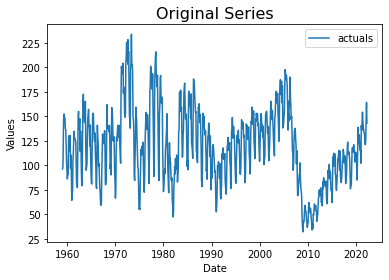

In [2]:
# Import the libraries and read the data:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scalecast.Forecaster import Forecaster
from scalecast.AnomalyDetector import AnomalyDetector 
from scalecast.SeriesTransformer import SeriesTransformer

df = pdr.get_data_fred(
    'HOUSTNSA', 
    start='1959-01-01',
    end='2022-05-01',
).reset_index()

f = Forecaster(
    y = df['HOUSTNSA'],
    current_dates=df['DATE']
)

f.plot()
plt.title('Original Series', size=16)
plt.show()